In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Exercise 2

In [2]:
N = np.arange(200, 1200, 200)

In [3]:
dfs = {}
for i in N:
    dfs[i] = pd.read_csv(f'analysis/analysis%d' % i, sep=' ', header=None)

In [4]:
R2ee = {}
for i in N:
    R2ee[i] = np.mean(dfs[i][1])
R2ee = np.array(list(R2ee.values()))

1.205132636171456


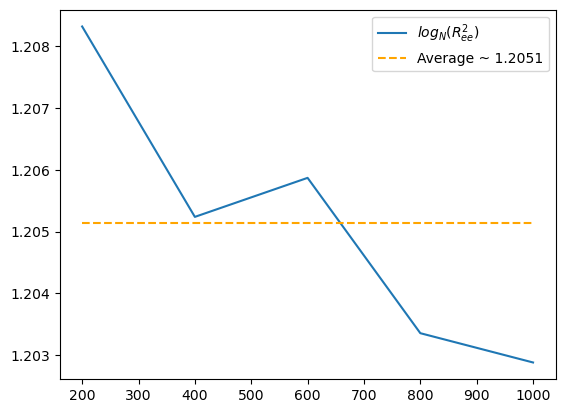

In [5]:
# plt.plot(N, R2ee)
plt.plot(N, np.emath.logn(N, R2ee), label='$log_N(R^2_{ee})$')
meanlog = np.mean(np.emath.logn(N, R2ee))
print(meanlog)
plt.hlines(meanlog, N[0], N[-1], linestyles='dashed', color='orange', label='Average ~ 1.2051')
plt.legend()

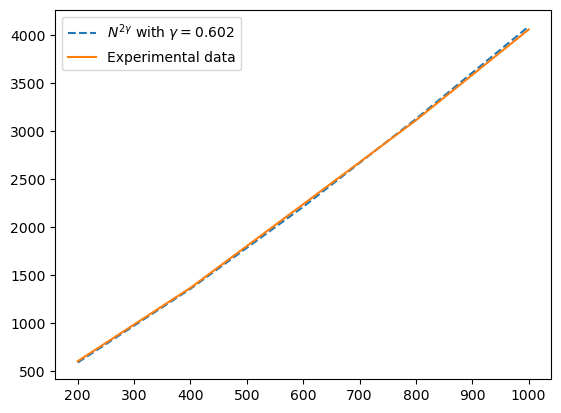

In [6]:
plt.plot(N, N**1.204, '--', label='$N^{2 \gamma}$ with $\gamma = 0.602$')
plt.plot(N, R2ee, label='Experimental data')
plt.legend()

# Exercise 3

In [5]:
def sample_R2ee(N, samples = 1000):
    μ = 0.0 # Average end to end radius
    r = np.array([[-1 , 0], [1, 0], [0, 1], [0, -1]]) # directions
    for _ in range(samples):
        # generate 'samples' random walks, calculate R2ee and calculate average
        walk = r[np.random.randint(0, 4, N)] # generates a random walk with N steps
        R = walk.sum(axis=0) 
        μ += np.dot(R, R) / samples
    return μ

In [6]:
%%time
N = np.array([200, 400, 600, 800, 1000])
R2ee = np.array([sample_R2ee(N) for N in N])

CPU times: user 368 ms, sys: 2.86 ms, total: 370 ms
Wall time: 369 ms


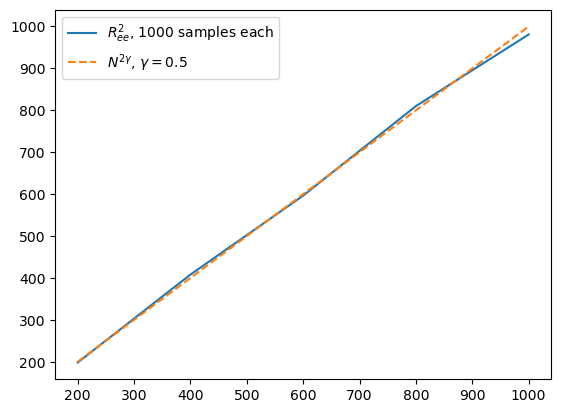

In [7]:
plt.plot(N, R2ee, label='$R^2_{ee}$, 1000 samples each')
plt.plot(N, N, '--', label='$N^{2 \gamma}$, $\gamma = 0.5$')
plt.legend()

# Exercise 4

In [7]:
from scipy.constants import k, pi, N_A, h

In [8]:
M = 60.08e-3 # kg/mol
m = M / N_A
T = 1450
v = np.arange(0, 3e3)
rho = (m / (2*pi*k*T))**1.5 * 4*pi*v*v*np.exp(-m*v*v/(2*k*T))

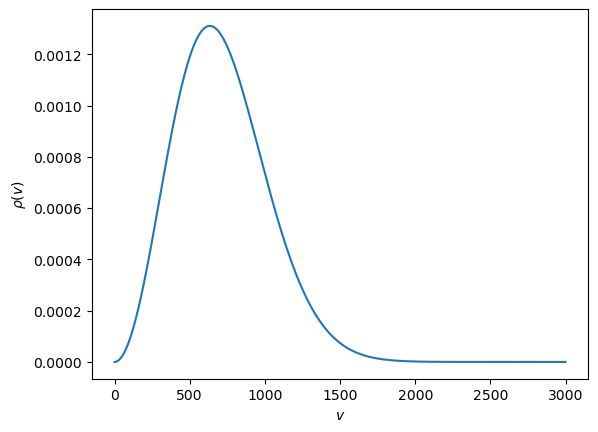

In [21]:
plt.plot(v, rho)
plt.xlabel('$v$')
plt.ylabel('$\\rho(v)$')
plt.show()

## b)

Given: $\rho(v) = 4 \pi \left(\frac{c}{2 \pi}\right)^\frac{3}{2} v^2 e^{-\frac{c v^2}{2}} \text{, with } c = \frac{m}{k_B T}$, calculate $\langle v \rangle = \int_0^{\infty} v \rho(v) \mathop{}\!\mathrm{d}x$.

\begin{align}
    \Rightarrow \langle v \rangle &= \int_0^{\infty} v \rho(v) \mathop{}\!\mathrm{d}x \\
        &= \int_0^{\infty} 4 \pi \left(\frac{c}{2 \pi}\right)^\frac{3}{2} f(v) g(v) \mathop{}\!\mathrm{d}x\\
        &= 4 \pi \left(\frac{c}{2 \pi}\right)^\frac{3}{2} \int_0^{\infty} f(v) g(v) \mathop{}\!\mathrm{d}x\\
        &= 4 \pi \left(\frac{c}{2 \pi}\right)^\frac{3}{2} \left( \left[ f(v) G(v) \right]_0^\infty - \int_0^{\infty} 2 v G(v) \mathop{}\!\mathrm{d}x \right)\\
        &= 4 \pi \left(\frac{c}{2 \pi}\right)^\frac{3}{2} \left( \underbrace{\left[ - v^2 \frac{e^{-\frac{c v^2}{2}}}{c} \right]_0^\infty}_{\rightarrow 0} + \frac{2}{c} \int_0^{\infty} v^2 e^{-\frac{c v^2}{2}} \mathop{}\!\mathrm{d}x \right)\\
        &= 4 \pi \left(\frac{c}{2 \pi}\right)^\frac{3}{2} \frac{2}{c} \int_0^{\infty} v g(v) \mathop{}\!\mathrm{d}x \\
        &= 4 \pi \left(\frac{c}{2 \pi}\right)^\frac{3}{2} \frac{2}{c} \left( \underbrace{\left[ - v \frac{e^{-\frac{c v^2}{2}}}{c} \right]_0^\infty}_{\rightarrow 0} + \frac{1}{c} \underbrace{\int_0^{\infty} e^{-\frac{c v^2}{2}}}_{=1} \right) \\
        &= 4 \pi \left(\frac{c}{2 \pi}\right)^\frac{3}{2} \frac{2}{c^2}\\
        &= 2 \frac{\pi}{\pi^{\frac{3}{2}}} \frac{\left(\frac{c}{2}\right)^\frac{3}{2}}{\left(\frac{c}{2}\right)^2}\\
        &= \sqrt{\frac{8}{c \pi}}
\end{align}

## c)

\begin{align}
    \langle p \rangle &= m \langle v \rangle = m \sqrt{\frac{8 k_B T}{\pi m}} = \sqrt{\frac{8 m k_B T}{\pi}} = \frac{2}{\pi} \sqrt{2 \pi m k_B T} = \frac{2}{\pi} p_T \\
    &\Rightarrow \lambda = \frac{\pi}{2} \lambda_T
\end{align}

## d)

In [23]:
wl = pi / 2 * h / np.sqrt(2 * pi * m * k * T) # m
bl = 1.6e-10 # m
print(f"The De Broglie wavelength of SiO2 is ~%d%% of the bond length. Therefore we ignore quantum effects." % (wl / bl * 100))

The De Broglie wavelength of SiO2 is ~5% of the bond length. Therefore we ignore quantum effects.
